In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import numpy as np

In [2]:
data = pd.read_csv("csvFiles/DATASET02_size_222.csv")

In [3]:
data.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
data.head()

,issue,urgency
0,"Upon reviewing my bank account statement, I no...",0.95
1,A discrepancy has emerged in my bank account b...,0.88
2,An unexpected overdraft fee appeared on my ban...,0.91
3,I received a notification about a large incomi...,0.94
4,A distressing situation unfolded when I discov...,0.96


In [6]:
data.shape

(222, 2)

In [6]:
X = data['issue']

In [7]:
y = data['urgency']

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
vectorizer = TfidfVectorizer(max_features = 600)

In [10]:
X_vectorized = vectorizer.fit_transform(X)

In [11]:
vocabulary = vectorizer.get_feature_names_out()
print(vocabulary)

['ability' 'about' 'abrupt' 'access' 'accessibility' 'accessing' 'account'
 'accounts' 'accrued' 'accuracy' 'accurate' 'across' 'action' 'activities'
 'activity' 'address' 'adjustment' 'advice' 'agreed' 'alarming' 'alert'
 'alerted' 'alerts' 'all' 'alleviate' 'allowing' 'amount' 'an' 'and'
 'anticipated' 'any' 'app' 'appears' 'application' 'appreciate' 'apps'
 'are' 'as' 'assistance' 'atm' 'attempted' 'attempting' 'attempts'
 'attention' 'authorize' 'authorized' 'auto' 'automatic' 'available'
 'avoid' 'balance' 'bank' 'banking' 'banks' 'based' 'be' 'been' 'before'
 'beforehand' 'behind' 'beneficial' 'between' 'bill' 'billing' 'block'
 'blog' 'browser' 'browsers' 'browsing' 'business' 'but' 'by'
 'calculation' 'calculations' 'calculators' 'can' 'canceled'
 'capabilities' 'capture' 'capturing' 'card' 'cash' 'cause' 'caused'
 'causing' 'certain' 'challenging' 'change' 'changes' 'charge' 'charges'
 'check' 'checking' 'checks' 'clarification' 'compared' 'compatibility'
 'complete' 'completi

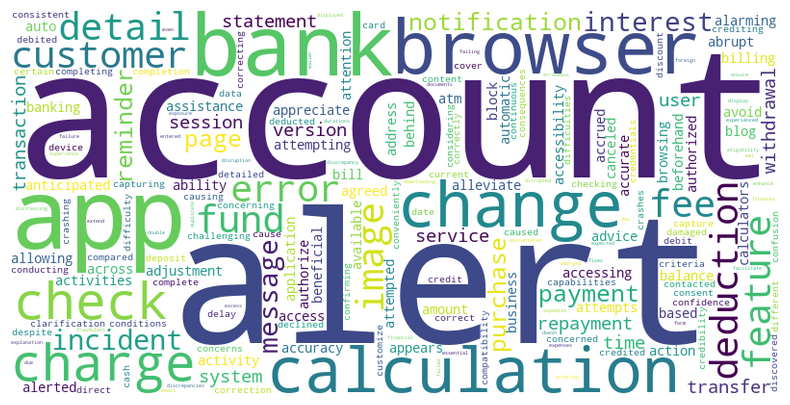

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

collection = ' '.join(vocabulary)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(collection)


# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis('off')
plt.show()

In [13]:
X_vectorized.shape

(222, 600)

In [14]:
model = SVR(kernel = 'sigmoid')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

SVR(kernel='sigmoid')

In [16]:
X_train.shape

(177, 600)

In [17]:
X_test.shape

(45, 600)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error
y_pred = model.predict(X_test)
y_pred = np.clip(y_pred, 0, 1)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("MAPE:", mape)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

Mean Squared Error: 0.00970532447927001
MAPE: 0.15913027746609093
0.8085027899307629
0.08163077141136404


In [23]:
y_pred_entireDataset = model.predict(X_vectorized)
y_pred_entireDataset = np.clip(y_pred_entireDataset, 0, 1)
y_pred_series = pd.Series(y_pred_entireDataset, name='Predicted_Urgency')

In [83]:
result = pd.concat([X.reset_index(drop=True),y_pred_series], axis=1)

In [84]:
result.head()

,issue,Predicted_Urgency
0,"Upon reviewing my bank account statement, I no...",0.850540
1,A discrepancy has emerged in my bank account b...,0.894093
2,An unexpected overdraft fee appeared on my ban...,0.809616
3,I received a notification about a large incomi...,0.840256
4,A distressing situation unfolded when I discov...,0.897215


In [85]:
result.to_csv("predictions.csv")

In [110]:
import numpy as np
complaint = ["One lakh got debited from my account without my permission. Looks like a cyber fraud. Look into it urgently and block my account. I did not expect such bad security from your bank. All my savings are under threat"]

#DO NOT USE fit_transform!!!!!!You need to transform the new data on previously fit vectorizer

complaint_vec = vectorizer.transform(complaint)
urgencyval = model.predict(complaint_vec)
print(urgencyval)

[0.72358995]


In [25]:
print(complaint_vec)

  (0, 79)	0.223775565522948
  (0, 93)	0.5645107983850092
  (0, 98)	0.2303578153151004
  (0, 103)	0.45502741287723697
  (0, 117)	0.1917866276692553
  (0, 119)	0.35511975533568074
  (0, 124)	0.3409654129518871
  (0, 167)	0.158661031278809
  (0, 186)	0.25848500609664266


In [24]:
complaints = [
    ["I have noticed an unauthorized transaction on my account dated May 10th for $500. This transaction was not made by me, and I am very concerned about the security of my account. I need this resolved immediately as it is affecting my balance and causing me significant stress. Additionally, I would like to know what measures are being taken to prevent such incidents in the future."],
    ["My credit card payment due date was suddenly changed without any notification. This caused me to miss the payment and incur a late fee, which I believe is unfair and needs to be rectified. I have always been prompt with my payments, and this sudden change has disrupted my financial planning. Please address this issue and waive the late fee, as it was not my fault."],
    ["I have been charged twice for the same purchase at your store on April 25th. This has resulted in an unnecessary deduction from my account, and I am now short on funds for other expenses. Please refund the duplicate charge as soon as possible and confirm that this will not happen again. I also suggest reviewing your payment processing system to avoid such errors."],
    ["I received my monthly statement, and there is a misprint in my name. It is spelled incorrectly and should be corrected in your records. This kind of error can lead to issues with identity verification and other banking services. Please update your records and send me a corrected statement. I would appreciate confirmation once this is done."],
    ["There is a typo in my passbook for the entry on March 3rd. It shows the wrong transaction description, which is a minor issue but needs correction for accurate record-keeping. Maintaining correct records is important for my financial tracking. Please update the passbook entry and send me a corrected version. This will help me keep my financial documents in order."]
]


sortedComplaints = []
for complaint in complaints:
    complaint_vec = vectorizer.transform(complaint)
    urgencyval = model.predict(complaint_vec)
    sortedComplaints.append([complaint, urgencyval])
print(sortedComplaints)

[[['I have noticed an unauthorized transaction on my account dated May 10th for $500. This transaction was not made by me, and I am very concerned about the security of my account. I need this resolved immediately as it is affecting my balance and causing me significant stress. Additionally, I would like to know what measures are being taken to prevent such incidents in the future.'], array([0.75020795])], [['My credit card payment due date was suddenly changed without any notification. This caused me to miss the payment and incur a late fee, which I believe is unfair and needs to be rectified. I have always been prompt with my payments, and this sudden change has disrupted my financial planning. Please address this issue and waive the late fee, as it was not my fault.'], array([0.75051201])], [['I have been charged twice for the same purchase at your store on April 25th. This has resulted in an unnecessary deduction from my account, and I am now short on funds for other expenses. Plea